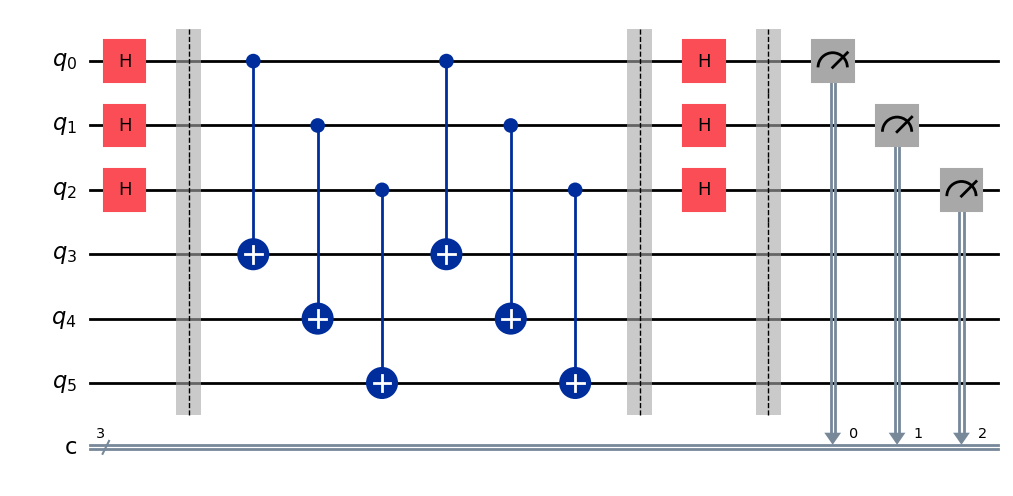

In [45]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
import numpy as np


n = 3
b = '111'
def simon_oracle(qc, n, b):
    b = b[::-1]
    for i in range(n):
        qc.cx(i, n+i)
    for i, s in enumerate(b):
        if s == '1':
            # for j in range(n):
            qc.cx(i, n+i)
    return qc
simon2 = QuantumCircuit(2*n, n)

simon2.h(range(n))
simon2.barrier()

simon_oracle(simon2, n, b)# simon2.measure([2,3], range(n))
simon2.barrier()
simon2.h(range(n))

simon2.barrier()
simon2.measure(range(n), range(n))
simon2.draw('mpl')

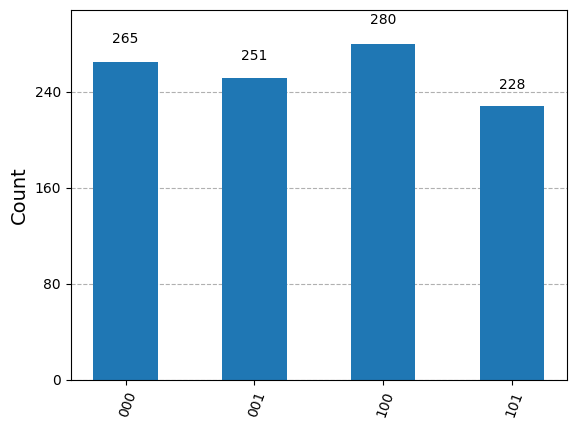

In [44]:

sim = Aer.get_backend('aer_simulator')

results = sim.run(simon2).result()
counts = results.get_counts()

plot_histogram(counts)


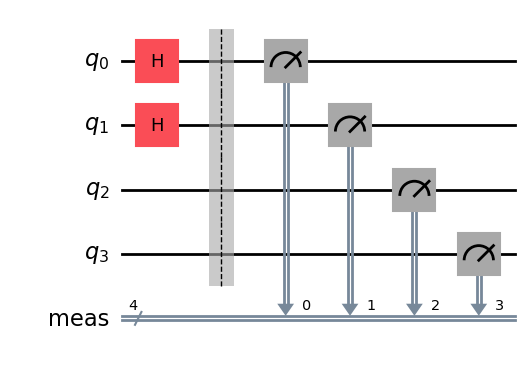

In [41]:
qc = QuantumCircuit(4)
qc.h(range(2))
qc.measure_all()
qc.draw('mpl')

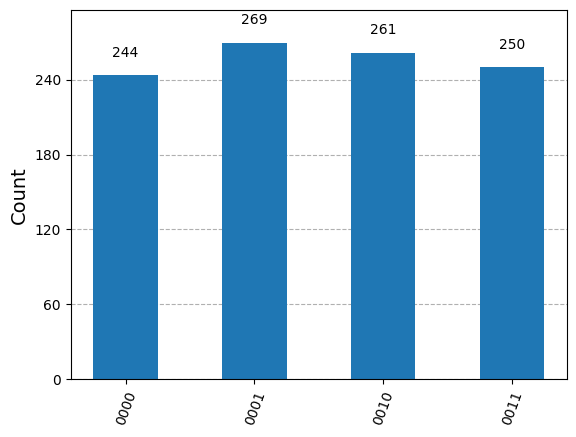

In [42]:
sim = Aer.get_backend('aer_simulator')

results = sim.run(qc).result()
counts = results.get_counts()

plot_histogram(counts)